In [1]:
#入力次元数の走査： k
#中間層の次元数の走査: j
#被験者の走査: i

#x1[i][k] # i 人目の k 次元目の値
x1_1 = [0, 0, 0, 0]
x1_2 = [0, 0, 0, 0]
x1_3 = [0, 0, 0, 0]
x1 = [x1_1, x1_2, x1_3]

n_dat = len(x1) #観測データ数
n1 = len(x1_1) #入力次元数
n2 = 5 #中間層の次元

#w1は、中間層の次元数×入力の次元数
#w1は[j][k]:中間層 j 番目、入力層 k 番目の w1 の値
w1 = []
for j in range(n2):
    temp_input = []
    for k in range(n1):
        temp_input.append(0)
    w1.append(temp_input)
    
#dl_dw1[i][j][k]: i 番目のデータ、中間層 j 次元目、入力層 k 、次元目の w1 の偏微分
dl_dw1 = []
for i in range(n_dat):
    temp_w1_j = []
    for j in range(n2):
        temp_w1_k = []
        for k in range(n1):
            temp_w1_k.append(0)
        temp_w1_j.append(temp_w1_k)
    dl_dw1.append(temp_w1_j)

print("w1", w1)
print(dl_dw1)

w1 [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]]


pre_x3 [0.19679613479163963, 0.6299639106598935, 0.6543280649563779, 0.7045512998614768]


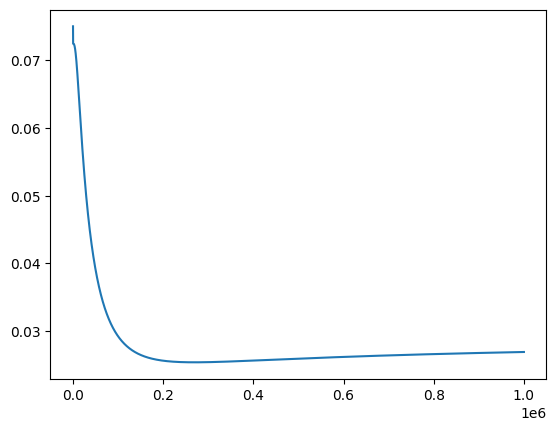

In [2]:
#入力次元数の走査： k
#中間層の次元数の走査： j
#被験者の走査： i

import numpy as np
from matplotlib import pyplot as plt
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

#データセット,0~1に規格化している
x1_1 = [0.1, 0.2] #被験者 i 人目の k 次元（i=1）（k=1, k=2）
x1_2 = [0.7, 0.5] #（i=2）（k=1, k=2）
x1_3 = [0.2, 0.9]
x1_4 = [0.7, 0.7]
x1 = [x1_1, x1_2, x1_3, x1_4] #i 次元（被験者数に対応するものだから。）
y_list = [0.2, 0.7, 0.4, 0.9] #i 次元 （被験者数に対応するものだから。）

n_dat = len(x1) #被験者の観測データ数（ i に関わる部分）
n1 = len(x1_1) #入力次元数 k
n2 = 3 #中間層の次元数（これは自分で設定するから、ただ数字を設定するのみ） j

#パラメータの初期値
w1_1 = [0.1, -0.1] #k 次元（入力次元数に対応するものだから。）
w1_2 = [-0.1, 0.1]
w1_3 = [0.0, 0.0]
w1 = [w1_1, w1_2, w1_3] #j 次元（中間層に対応するものだから。）
b1 = [-0.1, 0.0, 0.1] #j 次元（中間層に対応するものだから）
w2 = [0.1, -0.1, 0.0] #j 次元（中間層に対応するものだから。）
b2 = [0.0] #1次元（出力層の次元数に対応するものだから。）

#評価値のリスト
loss = []

#反復処理開始,イテレーションは t で設定している
iteration = 1000000
learning_rate = 0.01

for t in range(iteration):
    pre_c1 = [] # i * j （ i 被験者数、 j 中間層の次元数）
    for i in range(n_dat):
        temp_pre_c1 = []
        for j in range(n2):
            temp_pre_c1.append(0)
        pre_c1.append(temp_pre_c1)
    pre_x2 = []
    for i in range(n_dat):
        temp_pre_x2 = []
        for j in range(n2):
            temp_pre_x2.append(0)
        pre_x2.append(temp_pre_x2)
    pre_c2 = []
    for i in range(n_dat):
        pre_c2.append(0)
    pre_x3 = []
    for i in range(n_dat):
        pre_x3.append(0)
    
    #ここから微分のカラのリスト作成開始
    b2_i = [] #初期値の設定の際のb2と被っていたためにとりあえず末尾に _i を付加した
    w2_j = []
    b1_j = []
    w1_jk = []
    for i in range(n_dat):
        b2_i.append(0)
    for i in range(n_dat):
        temp_w2_j = []
        temp_b1_j = []
        for j in range(n2):
            temp_w2_j.append(0)
            temp_b1_j.append(0)
        w2_j.append(temp_w2_j)
        b1_j.append(temp_b1_j)
        
    for i in range(n_dat):
        temp1_w1_jk = []
        for j in range(n2):
            temp2_w1_jk = []
            for k in range(n1):
                temp2_w1_jk.append(0)
            temp1_w1_jk.append(temp2_w1_jk)
        w1_jk.append(temp1_w1_jk)
    
    #pre_c1の完成
    for i in range(n_dat):
        for j in range(n2):
            for k in range(n1):
                pre_c1[i][j] += w1[j][k] * x1[i][k]
            pre_c1[i][j] += b1[j]
    #pre_x2の完成
    for i in range(n_dat):
        for j in range(n2):
            pre_x2[i][j] = sigmoid(pre_c1[i][j])
    #pre_c2の完成
    for i in range(n_dat):
           for j in range(n2):
                pre_c2[i] += w2[j] * pre_x2[i][j]
                pre_c2[i] += b2[0]
    #pre_x3の完成（予測が完成した）
    for i in range(n_dat):
            pre_x3[i] = sigmoid(pre_c2[i])
    
    #微分係数の作成
    for i in range(n_dat):
        b2_i[i] = 2 * (pre_x3[i] - y_list[i]) * pre_x3[i] * (1 - pre_x3[i])
        for j in range(n2):
            w2_j[i][j] = b2_i[i] * pre_x2[i][j]
            b1_j[i][j] = b2_i[i] * w2_j[i][j] * pre_x2[i][j] * (1 - pre_x2[i][j])
            for k in range(n1):
                w1_jk[i][j][k] = b1_j[i][j] * x1[i][k]
    
    #sumの微分リスト作成
    des_b2 = []
    des_w2_j = []
    des_b1_j = []
    des_w1_jk = []
    for j in range(n2):
        des_w2_j.append(0)
        des_b1_j.append(0)
        temp_des_w1_jk = []
        for k in range(n1):
            temp_des_w1_jk.append(0)
        des_w1_jk.append(temp_des_w1_jk)
    
    #sumのリスト
    des_b2.append(sum(b2_i))
    for j in range(n2):
        for i in range(n_dat):
            des_w2_j[j] += w2_j[i][j]
            des_b1_j[j] += b1_j[i][j]
            
    for i in range(n_dat):   
        for j in range(n2):
            for k in range(n1):
                des_w1_jk[j][k] += w1_jk[i][j][k]

    b2[0] = b2[0] - learning_rate * des_b2[0]
    for j in range(n2):
        w2[j] = w2[j] - learning_rate * des_w2_j[j]
        b1[j] = b1[j] - learning_rate * des_b1_j[j]
        for k in range(n1):
            w1[j][k] = w1[j][k] - learning_rate * des_w1_jk[j][k]
    
    #評価値の計算
    l = 0
    for i in range(n_dat):
        l += (y_list[i] - pre_x3[i]) ** 2
    l = l / n_dat
    loss.append(l)
    
    #print("---------------------")
    #print("---------------------")
    #print("pre_c1", pre_c1)
    #print("pre_x2", pre_x2)
    #print("pre_c2", pre_c2)
    #print("pre_x3", pre_x3)
    
    #print("b2", b2)
    #print("w2_j", w2_j)
    #print("b1_j", b1_j)
    #print("w1_jk", w1_jk)
    
    #print("des_b2", des_b2)
    #print("des_w2_j", des_w2_j)
    #print("des_b1_j", des_b1_j)
    #print("des_w1_jk", des_w1_jk)
    
    
    
#print("pre_c1", pre_c1)
#print("pre_x2", pre_x2)
#print("pre_c2", pre_c2)
print("pre_x3", pre_x3)

#print("b2", b2)
#print("w2_j", w2_j)
#print("b1_j", b1_j)
#print("w1_jk", w1_jk)

#print("des_b2", des_b2)
#print("des_w2_j", des_w2_j)
#print("des_b1_j", des_b1_j)
#print("des_w1_jk", des_w1_jk)
#print(loss)

plt.plot(loss)
plt.show()

pre_x3 [0.31943414204802195, 0.6030796480582783, 0.6148895833752831, 0.660355842897854]


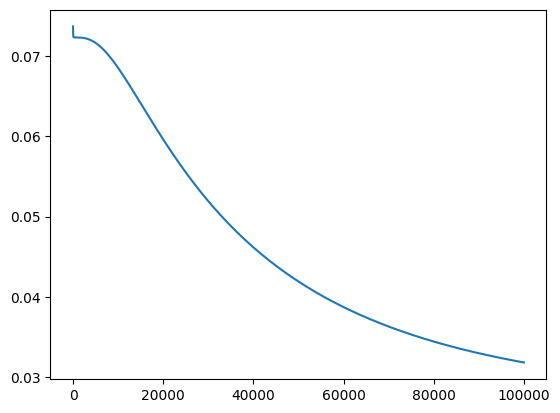

In [3]:
 #入力次元数の走査： k
#中間層の次元数の走査： j
#被験者の走査： i

import numpy as np
from matplotlib import pyplot as plt
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

#データセット,0~1に規格化している
x1_1 = [0.1, 0.2] #被験者 i 人目の k 次元（i=1）（k=1, k=2）
x1_2 = [0.7, 0.5] #（i=2）（k=1, k=2）
x1_3 = [0.2, 0.9]
x1_4 = [0.7, 0.7]
x1 = [x1_1, x1_2, x1_3, x1_4] #i 次元（被験者数に対応するものだから。）
y_list = [0.2, 0.7, 0.4, 0.9] #i 次元 （被験者数に対応するものだから。）

n_dat = len(x1) #被験者の観測データ数（ i に関わる部分）
n1 = len(x1_1) #入力次元数 k
n2 = 3 #中間層の次元数（これは自分で設定するから、ただ数字を設定するのみ） j

#パラメータの初期値
w1_1 = [0.1, -0.1] #k 次元（入力次元数に対応するものだから。）
w1_2 = [-0.1, 0.1]
w1_3 = [0.1, -0.1]
w1 = [w1_1, w1_2, w1_3] #j 次元（中間層に対応するものだから。）
b1 = [-0.1, -0.1, 0.1] #j 次元（中間層に対応するものだから）
w2 = [0.1, -0.1, 0.1] #j 次元（中間層に対応するものだから。）
b2 = [0.1] #1次元（出力層の次元数に対応するものだから。）

#評価値のリスト
loss = []

#反復処理開始,イテレーションは t で設定している

iteration = 100000
learning_rate = 0.01

for t in range(iteration):
    pre_c1 = [] # i * j （ i 被験者数、 j 中間層の次元数）
    for i in range(n_dat):
        temp_pre_c1 = []
        for j in range(n2):
            temp_pre_c1.append(0)
        pre_c1.append(temp_pre_c1)
    pre_x2 = []
    for i in range(n_dat):
        temp_pre_x2 = []
        for j in range(n2):
            temp_pre_x2.append(0)
        pre_x2.append(temp_pre_x2)
    pre_c2 = []
    for i in range(n_dat):
        pre_c2.append(0)
    pre_x3 = []
    for i in range(n_dat):
        pre_x3.append(0)
    
    #ここから微分のカラのリスト作成開始
    b2_i = [] #初期値の設定の際のb2と被っていたためにとりあえず末尾に _i を付加した
    w2_j = []
    b1_j = []
    w1_jk = []
    for i in range(n_dat):
        b2_i.append(0)
    for i in range(n_dat):
        temp_w2_j = []
        temp_b1_j = []
        for j in range(n2):
            temp_w2_j.append(0)
            temp_b1_j.append(0)
        w2_j.append(temp_w2_j)
        b1_j.append(temp_b1_j)
        
    for i in range(n_dat):
        temp1_w1_jk = []
        for j in range(n2):
            temp2_w1_jk = []
            for k in range(n1):
                temp2_w1_jk.append(0)
            temp1_w1_jk.append(temp2_w1_jk)
        w1_jk.append(temp1_w1_jk)
    
    #pre_c1の完成
    for i in range(n_dat):
        for j in range(n2):
            for k in range(n1):
                pre_c1[i][j] += w1[j][k] * x1[i][k]
            pre_c1[i][j] += b1[j]
    #pre_x2の完成
    for i in range(n_dat):
        for j in range(n2):
            pre_x2[i][j] = sigmoid(pre_c1[i][j])
    #pre_c2の完成
    for i in range(n_dat):
           for j in range(n2):
                pre_c2[i] += w2[j] * pre_x2[i][j]
                pre_c2[i] += b2[0]
    #pre_x3の完成（予測が完成した）
    for i in range(n_dat):
            pre_x3[i] = sigmoid(pre_c2[i])
    
    #微分係数の作成
    for i in range(n_dat):
        b2_i[i] = 2 * (pre_x3[i] - y_list[i]) * pre_x3[i] * (1 - pre_x3[i])
        for j in range(n2):
            w2_j[i][j] = b2_i[i] * pre_x2[i][j]
            b1_j[i][j] = b2_i[i] * w2_j[i][j] * pre_x2[i][j] * (1 - pre_x2[i][j])
            for k in range(n1):
                w1_jk[i][j][k] = b1_j[i][j] * x1[i][k]
    
    #sumの微分リスト作成
    des_b2 = []
    des_w2_j = []
    des_b1_j = []
    des_w1_jk = []
    for j in range(n2):
        des_w2_j.append(0)
        des_b1_j.append(0)
        temp_des_w1_jk = []
        for k in range(n1):
            temp_des_w1_jk.append(0)
        des_w1_jk.append(temp_des_w1_jk)
    
    #sumのリスト
    des_b2.append(sum(b2_i))
    for j in range(n2):
        for i in range(n_dat):
            des_w2_j[j] += w2_j[i][j]
            des_b1_j[j] += b1_j[i][j]
            
    for i in range(n_dat):   
        for j in range(n2):
            for k in range(n1):
                des_w1_jk[j][k] += w1_jk[i][j][k]

    b2[0] = b2[0] - learning_rate * des_b2[0]
    for j in range(n2):
        w2[j] = w2[j] - learning_rate * des_w2_j[j]
        b1[j] = b1[j] - learning_rate * des_b1_j[j]
        for k in range(n1):
            w1[j][k] = w1[j][k] - learning_rate * des_w1_jk[j][k]
    
    #評価値の計算
    l = 0
    for i in range(n_dat):
        l += (y_list[i] - pre_x3[i]) ** 2
    l = l / n_dat
    loss.append(l)

print("pre_x3", pre_x3)

plt.plot(loss)
plt.show()